In [3]:
import torch
from RNN import rnn
from torch import nn, optim
batch_size,num_steps = 32,35
train_iter, vocab = rnn.load_data_time_machine(batch_size, num_steps)

In [4]:
def get_params(vocab_size,num_hiddens,device):
	num_inputs = num_outputs = vocab_size

	def normal(shape):
		return torch.randn(size=shape, device=device) * 0.01
	
	def three():
		return (normal((num_inputs, num_hiddens)),
				normal((num_hiddens, num_hiddens)),
				torch.zeros(num_hiddens, device=device))
	
	W_xi, W_hi, b_i = three() # input gate
	W_xf, W_hf, b_f = three() # forget gate
	W_xo, W_ho, b_o = three() # output gate
	W_xc, W_hc, b_c = three() # candidate memory cell

	W_hq = normal((num_hiddens, num_outputs))
	b_q = torch.zeros(num_outputs, device=device)

	params = [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q]

	for param in params:
		param.requires_grad_(True)
	
	return params


def init_lstm_state(batch_size, num_hiddens, device):
	return (torch.zeros((batch_size, num_hiddens), device=device),
			torch.zeros((batch_size, num_hiddens), device=device))

def lstm(inputs,state,params):
	W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q = params
	(H, C) = state
	outputs = []
	for X in inputs:
		I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
		F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
		O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
		C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
		C = F * C + I * C_tilda
		H = O * torch.tanh(C)
		Y = (H @ W_hq) + b_q
		outputs.append(Y)
	return torch.cat(outputs, dim=0), (H, C)

Epoch 10, Perplexity: 20.99, Speed: 9675.84 tokens/sec
Epoch 20, Perplexity: 20.07, Speed: 9124.28 tokens/sec
Epoch 30, Perplexity: 19.71, Speed: 9328.98 tokens/sec
Epoch 40, Perplexity: 18.81, Speed: 10769.20 tokens/sec
Epoch 50, Perplexity: 17.31, Speed: 9825.64 tokens/sec
Epoch 60, Perplexity: 15.11, Speed: 7207.44 tokens/sec
Epoch 70, Perplexity: 13.49, Speed: 9331.63 tokens/sec
Epoch 80, Perplexity: 12.61, Speed: 9451.23 tokens/sec
Epoch 90, Perplexity: 12.08, Speed: 10990.90 tokens/sec
Epoch 100, Perplexity: 11.53, Speed: 9727.98 tokens/sec
Epoch 110, Perplexity: 11.11, Speed: 10445.69 tokens/sec
Epoch 120, Perplexity: 10.64, Speed: 11023.67 tokens/sec
Epoch 130, Perplexity: 10.19, Speed: 8125.34 tokens/sec
Epoch 140, Perplexity: 9.76, Speed: 9492.80 tokens/sec
Epoch 150, Perplexity: 9.31, Speed: 10659.34 tokens/sec
Epoch 160, Perplexity: 9.01, Speed: 11083.78 tokens/sec
Epoch 170, Perplexity: 8.57, Speed: 11021.59 tokens/sec
Epoch 180, Perplexity: 8.15, Speed: 10414.39 tokens/se

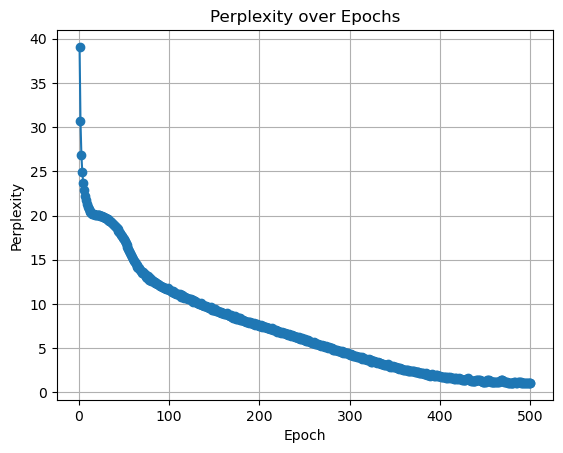

In [5]:
vocab_size , num_hiddens,device = len(vocab),256,torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs,lr = 500,1
model = rnn.RNNModelScratch(len(vocab), num_hiddens, device, get_params, init_lstm_state, lstm)

rnn.train(model, train_iter, vocab,lr,num_epochs,device)

Epoch 10, Perplexity: 20.21, Speed: 155077.92 tokens/sec
Epoch 20, Perplexity: 19.39, Speed: 153345.38 tokens/sec
Epoch 30, Perplexity: 17.59, Speed: 152232.86 tokens/sec
Epoch 40, Perplexity: 14.68, Speed: 141609.22 tokens/sec
Epoch 50, Perplexity: 12.75, Speed: 152235.94 tokens/sec
Epoch 60, Perplexity: 12.02, Speed: 149931.03 tokens/sec
Epoch 70, Perplexity: 10.98, Speed: 143503.42 tokens/sec
Epoch 80, Perplexity: 10.55, Speed: 142402.30 tokens/sec
Epoch 90, Perplexity: 10.06, Speed: 154918.75 tokens/sec
Epoch 100, Perplexity: 9.35, Speed: 102988.92 tokens/sec
Epoch 110, Perplexity: 8.82, Speed: 136032.80 tokens/sec
Epoch 120, Perplexity: 8.34, Speed: 146143.00 tokens/sec
Epoch 130, Perplexity: 7.91, Speed: 171082.30 tokens/sec
Epoch 140, Perplexity: 7.23, Speed: 149476.62 tokens/sec
Epoch 150, Perplexity: 6.75, Speed: 135570.53 tokens/sec
Epoch 160, Perplexity: 6.38, Speed: 170343.28 tokens/sec
Epoch 170, Perplexity: 5.82, Speed: 151633.98 tokens/sec
Epoch 180, Perplexity: 5.38, Sp

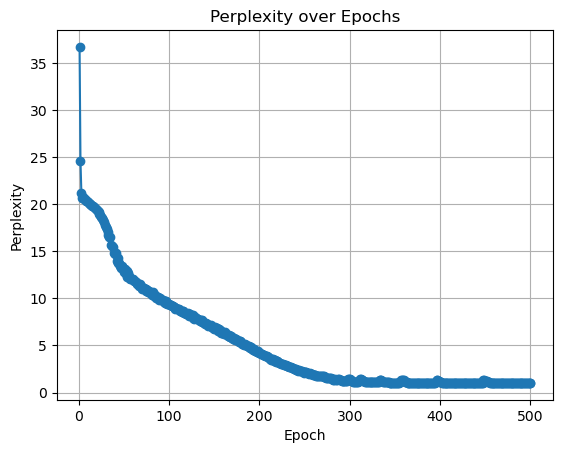

In [6]:
num_inputs = len(vocab)
lstm_layer = nn.LSTM(num_inputs, num_hiddens)
model = rnn.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
rnn.train(model, train_iter, vocab,lr,num_epochs,device)